# Position Encoding
In this exercise, we will look at position encoding for the Transformer architecture.

In [6]:
import torch
import torch.nn as nn

import nltk

## Creating an Embedding
Consider the following vocabulary:

In [2]:
vocab = ['dog', 'cat', 'fox', 'walks', 'jumps', 'sleeps', 'and', 'the', '.', ',']
print(f'Vocab size: {len(vocab)}')

Vocab size: 10


Take a look at the [nn.Embedding documentation](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html). Create an embedding with a vocabulary size of 10 and an embedding dimension of 6.

In [4]:
embedding = nn.Embedding(len(vocab), 6)

Embed the sentence: "the dog sleeps , the cat walks and the fox jumps ."

In [ ]:
sentence = "the dog sleeps , the cat walks and the fox jumps ."

tokens = sentence.split()
words_ids = [vocab.index(token) for token in tokens]

token_id_tensor = torch.LongTensor(words_ids)
embedding_out = embedding(token_id_tensor)

print(embedding_out.shape)

print(f'Words IDs: {words_ids}')

embedding_matrix = embedding.weight.data
print(f'Embedding matrix: {embedding_matrix}')

torch.Size([12, 6])
Words IDs: [7, 0, 5, 9, 7, 1, 3, 6, 7, 2, 4, 8]
Embedding output: tensor([[ 0.5704, -0.6214, -0.7624,  1.2955,  0.6345, -0.0387],
        [ 0.5850, -0.7583, -1.1779, -0.5311, -0.6519, -0.1953],
        [-0.4734,  0.9296,  0.9280, -0.1995,  1.6648, -1.0173],
        [ 0.1187,  0.6830, -0.0309, -0.7239, -1.5603,  0.0838],
        [ 0.5704, -0.6214, -0.7624,  1.2955,  0.6345, -0.0387],
        [-0.5366,  0.9544,  1.0029,  1.7794, -0.1352, -0.0202],
        [ 0.0960, -0.0833,  2.4849,  1.5314, -1.2861,  1.6126],
        [ 0.2735,  0.9116,  1.1832, -1.5213, -1.6016, -0.0286],
        [ 0.5704, -0.6214, -0.7624,  1.2955,  0.6345, -0.0387],
        [-0.5746, -0.7126, -1.6976, -0.7510, -0.1687,  1.2628],
        [ 1.8056, -0.1080, -1.3661, -1.3039,  0.8001,  1.5938],
        [-1.5511,  0.1972, -0.0452, -0.9878,  1.0933,  0.5447]],
       grad_fn=<EmbeddingBackward0>)
Embedding matrix: tensor([[ 0.5850, -0.7583, -1.1779, -0.5311, -0.6519, -0.1953],
        [-0.5366,  0.9544,

## Absolute Position Encoding
The functions for absolute position encoding, as defined in [the Transformer paper](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf) are as follows:

$$
\begin{align}
pos_{i, 2j} &= \sin(i / 10000^{2j/d}) \\
pos_{i, 2j+1} &= \cos(i / 10000^{2j/d})
\end{align}
$$
where $i$ is the absolute position in the sequence, and $j$ is the dimension of the embedding vector.

Create a function `absolute_position_encoding` that takes the position in the sequence $i$ and the dimension $d$ as an input and returns the position vector.

In [16]:
def absolute_position_encoding(position, dim):
    assert dim % 2 == 0, "dim must be even"
    dim_vector = torch.arange(0, dim, 2) # lengsht of dim/2
    dim_vector = 10000 ** (dim_vector / dim)
    pos_enc = torch.ones(dim) * position
    pos_enc[0::2] = torch.sin(pos_enc[0::2] / dim_vector)
    pos_enc[1::2] = torch.cos(pos_enc[1::2] / dim_vector)
    pos_enc.requires_grad = False
    return pos_enc

Run the command below to see the values for the position vectors of the first 100 positions and the first 5 dimensions.

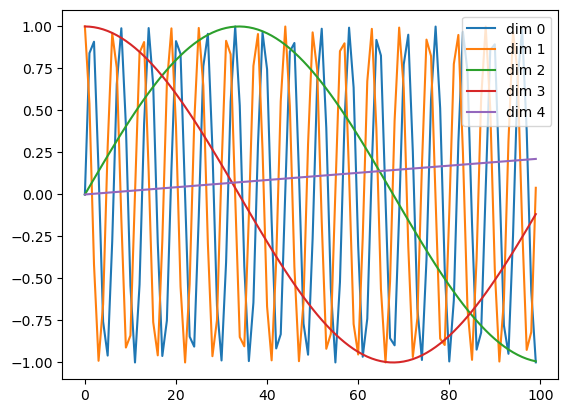

In [17]:
import matplotlib.pyplot as plt

emb_dim = 6

plt.figure()
x = list(range(100))
pos_vectors = [absolute_position_encoding(i, emb_dim) for i in x]
for dim in range(5):
    y = [pv[dim].item() for pv in pos_vectors]
    plt.plot(x, y, label=f'dim {dim}')
plt.legend()
plt.show()

Apply the position encoding to the embeddings from earlier.

In [21]:
seq_len, emb_dim = embedding_out.shape
print(f'Sequence length: {seq_len}, Embedding dimension: {emb_dim}')

pos_emb = torch.stack([absolute_position_encoding(i, emb_dim) for i in range(seq_len)], dim=0)
print(f'Position embedding shape: {pos_emb.shape}')
print(f'Position embedding: {pos_emb}')

x = embedding_out + pos_emb
print(f'Final embedding shape: {x.shape}')
print(f'Final embedding: {x}')


Sequence length: 12, Embedding dimension: 6
Position embedding shape: torch.Size([12, 6])
Position embedding: tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998],
        [-0.5440, -0.8391,  0.4477,  0.8942,  0.0215,  0.9998],
        [-1.0000,  0.0044,  0.4887,  0.8725,  0.0237,  0.9997]])
Final embedding shape: torch.Size([12, 6])
Final embedding: tensor([[ 0.5704,  0.3786, -0.7624,  2.2955,  0.6345,  0.9613

## Absolute Position Embedding
Write a class `AbsolutePositionEmbedding` that is initialized with a maximum length and an embedding dimension. In its `forward` method, it should take an input tensor (of shape `[batch_size, sequence_length, embedding_dim]`) and add the position embeddings to the input tensor.

In [26]:
class AbsolutePositionEmbedding(nn.Module):
    
    def __init__(self, embedding_dim, max_length=512):
        super().__init__()
        self.max_length = max_length
        self.pos_emb = nn.Embedding(max_length, embedding_dim)
    
    def forward(self, x):
        seq_len = x.shape[1]
        positions = torch.arange(seq_len)
        pos_emb = self.pos_emb(positions).unsqueeze(0) # shape: [1, seq_len, emb_dim]
        return x + pos_emb

Try your class with an example.

In [27]:
absolute_position_embedding = AbsolutePositionEmbedding(20, 512)
x1 = torch.randn(5, 12, 20)
x = absolute_position_embedding(x1)
print(x.shape)

torch.Size([5, 12, 20])


## Relative Position Embedding
Create a class `RelativePositionEmbedding` that is initialized with a maximum relative distance and an embedding dimension. Its `forward` method should take an input tensor of size `[batch_size, hidden_dim]` and apply the relative position embeddings given the positions $i$ of the query and $j$ of the key.

In [28]:
class RelativePositionEmbedding(nn.Module):
    
    def __init__(self, embedding_dim, max_dist=16):
        super().__init__()
        self.max_dist = max_dist
        self.embedding_dim = embedding_dim
        self.pos_emb = nn.Embedding(2 * max_dist + 1, embedding_dim)
    
    def forward(self, x, i, j):
        rel_pos = j - i + self.max_dist
        rel_pos = max(0, min(2 * self.max_dist, rel_pos))
        rel_pos_emb = self.pos_emb(torch.tensor(rel_pos)) # shape: [1, emb_dim]
        return x + rel_pos_emb.unsqueeze(0) # shape: [1, emb_dim]

Try it with an example.

In [30]:
rel_pos_emb = RelativePositionEmbedding(20, 16)
x = torch.randn(5, 20)
result = rel_pos_emb(x, 0, 3)
result = rel_pos_emb(x, 490, 15)
print(result.shape)

torch.Size([5, 20])


**Question:** Where would we use this module?

**Answer:** 

- Relative position embedding is only used in self attention
- We are insite of an attention head (it won't be the embedding_dim but the head_dim) -> We would do it in the compute dot product function

**Question:** Look at the HuggingFace implementation of relative position embeddings in the BERT model:
- [initialization from line 244](https://github.com/huggingface/transformers/blob/v4.46.0/src/transformers/models/bert/modeling_bert.py#L244)
- [forward method from line 320](https://github.com/huggingface/transformers/blob/v4.46.0/src/transformers/models/bert/modeling_bert.py#L320)

Describe what their `relative_key` method does differently from the [Shaw et al. (2018)](https://aclanthology.org/N18-2074/) paper we saw in the lecture.

**Answer:**

Init Method: 
- Line 246: Max position - 1 (Decrease max position to minus 1) -> We do plus 1 in our implementation
- 2 Versions of embeddings
- Accurate relativ positions until the very end (They use the full max position)

Forward pass:
- Calculating attention scores
- torch.einsum (tensor multiplications, you give names to the dimensions)
- They multiply query with position embeddings (They just multiplied it out of the given formula)


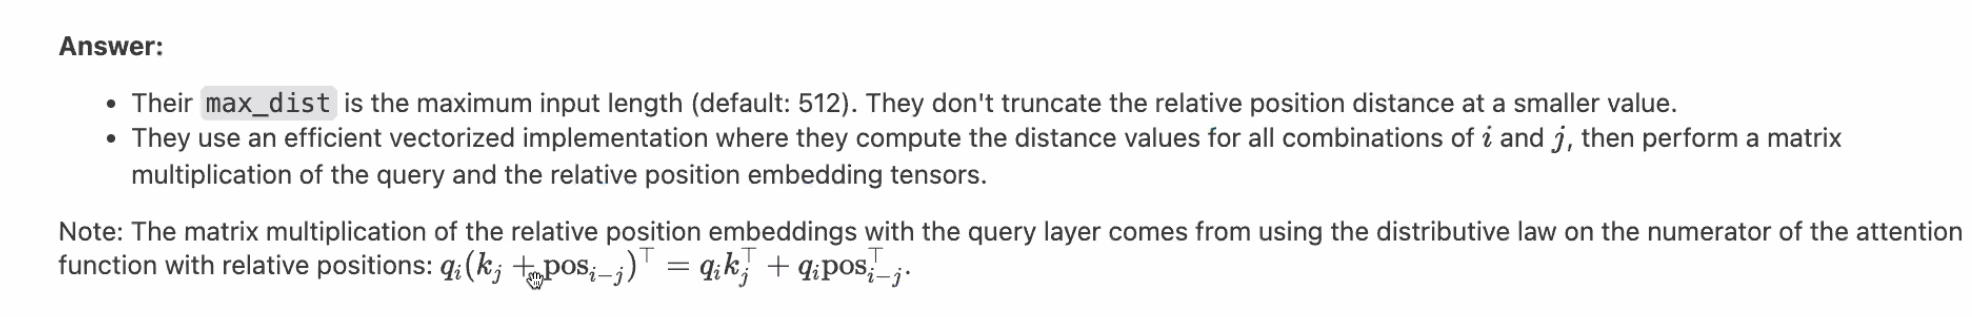
